In [1]:
import pandas as pd
data = pd.read_csv('data/encoded_telco_churn.csv')

In [2]:
data['Tenure_MonthlyCharges'] = data['tenure'] * data['MonthlyCharges']
print("Created Tenure_MonthlyCharges")

Created Tenure_MonthlyCharges


In [4]:
service_columns = [
    'PhoneService',
    'InternetService_Fiber optic',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]
data['ServicesCount'] = data[service_columns].sum(axis=1)
print("Created ServicesCount")
print(data[['Tenure_MonthlyCharges', 'ServicesCount']].head())

Created ServicesCount
   Tenure_MonthlyCharges ServicesCount
0                  29.85             1
1                1936.30             3
2                 107.70             3
3                1903.50             3
4                 141.40             2


In [5]:
data['TenureGroup'] = pd.cut(
    data['tenure'],
    bins=[0, 12, 24, 48, data['tenure'].max()],
    labels=['0-12', '13-24', '25-48', '49+'],
    include_lowest=True
)
print("Created TenureGroup")

Created TenureGroup


In [6]:
data = pd.get_dummies(data, columns=['TenureGroup'], prefix='TenureGroup')
print("Encoded TenureGroup columns:", [col for col in data.columns if 'TenureGroup' in col])
print(data[[col for col in data.columns if 'TenureGroup' in col]].head())

Encoded TenureGroup columns: ['TenureGroup_0-12', 'TenureGroup_13-24', 'TenureGroup_25-48', 'TenureGroup_49+']
   TenureGroup_0-12  TenureGroup_13-24  TenureGroup_25-48  TenureGroup_49+
0              True              False              False            False
1             False              False               True            False
2              True              False              False            False
3             False              False               True            False
4              True              False              False            False


In [7]:
# Flag high MonthlyCharges (top 25%)
data['HighCharges'] = (data['MonthlyCharges'] > data['MonthlyCharges'].quantile(0.75)).astype(int)
print("Created HighCharges")

Created HighCharges


In [9]:
# Flag long tenure (top 25%)
data['LongTenure'] = (data['tenure'] > data['tenure'].quantile(0.75)).astype(int)
print("Created LongTenure")
print(data[['HighCharges', 'LongTenure']].head())

Created LongTenure
   HighCharges  LongTenure
0            0           0
1            0           0
2            0           0
3            0           0
4            0           0


Correlations with Churn:
 tenure                                  -0.352229
Contract_Two year                       -0.302253
TenureGroup_49+                         -0.263222
LongTenure                              -0.245136
DeviceProtection_No internet service    -0.227890
StreamingTV_No internet service         -0.227890
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
TechSupport_No internet service         -0.227890
StreamingMovies_No internet service     -0.227890
OnlineBackup_No internet service        -0.227890
TotalCharges                            -0.199037
Tenure_MonthlyCharges                   -0.198514
Contract_One year                       -0.177820
OnlineSecurity_Yes                      -0.171226
TechSupport_Yes                         -0.164674
Dependents                              -0.164221
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed che

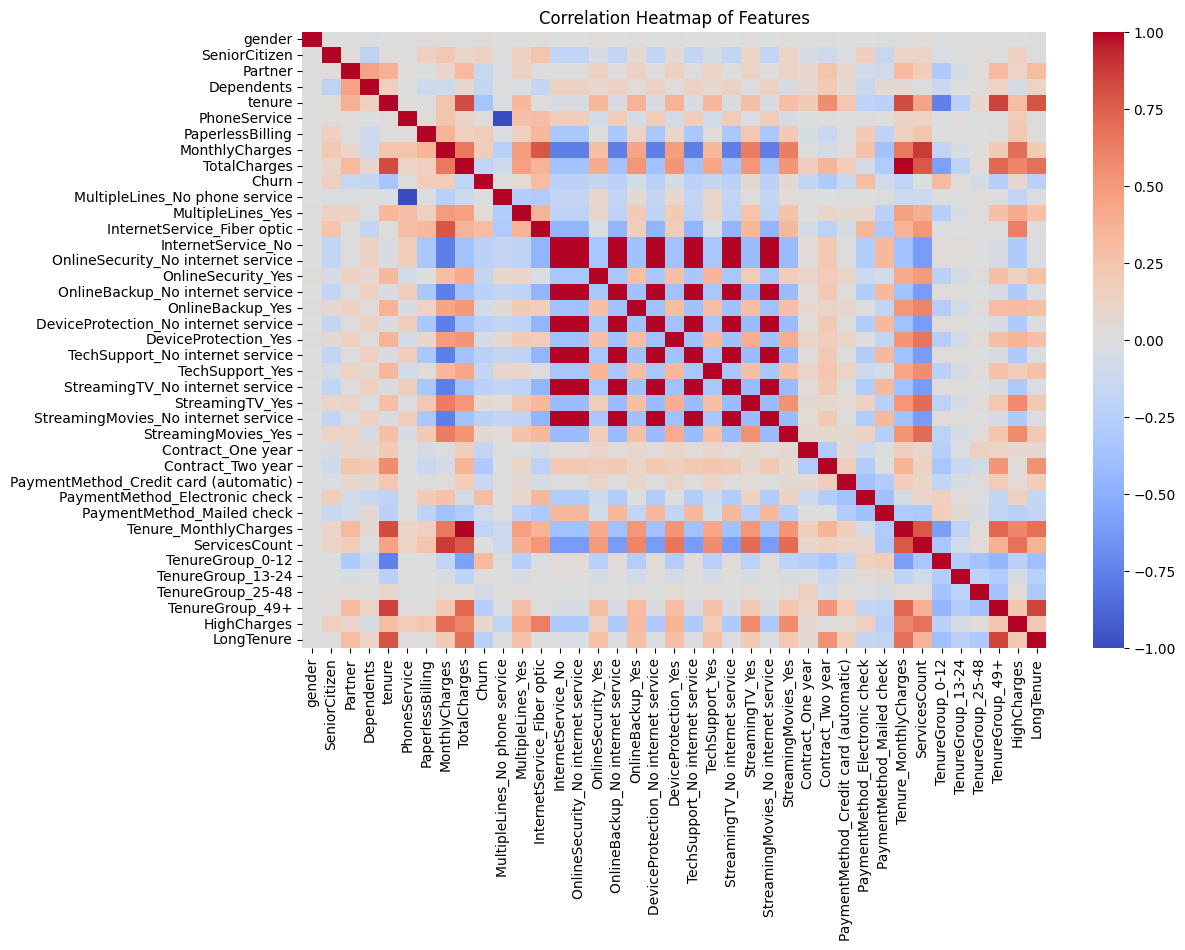

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = data.corr()['Churn'].sort_values()
print("Correlations with Churn:\n", correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.savefig('images/correlation_heatmap.png')
plt.show()

In [12]:
low_impact_cols = correlations[abs(correlations) < 0.05].index.tolist()
if low_impact_cols:
    print("Dropping low-impact features:", low_impact_cols)
    data = data.drop(columns=low_impact_cols)
else:
    print("No low-impact features to drop")

Dropping low-impact features: ['MultipleLines_No phone service', 'ServicesCount', 'gender', 'PhoneService', 'TenureGroup_13-24', 'MultipleLines_Yes']


Correlations with Churn:
 tenure                                  -0.352229
Contract_Two year                       -0.302253
TenureGroup_49+                         -0.263222
LongTenure                              -0.245136
OnlineBackup_No internet service        -0.227890
StreamingMovies_No internet service     -0.227890
OnlineSecurity_No internet service      -0.227890
DeviceProtection_No internet service    -0.227890
TechSupport_No internet service         -0.227890
StreamingTV_No internet service         -0.227890
InternetService_No                      -0.227890
TotalCharges                            -0.199037
Tenure_MonthlyCharges                   -0.198514
Contract_One year                       -0.177820
OnlineSecurity_Yes                      -0.171226
TechSupport_Yes                         -0.164674
Dependents                              -0.164221
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed che

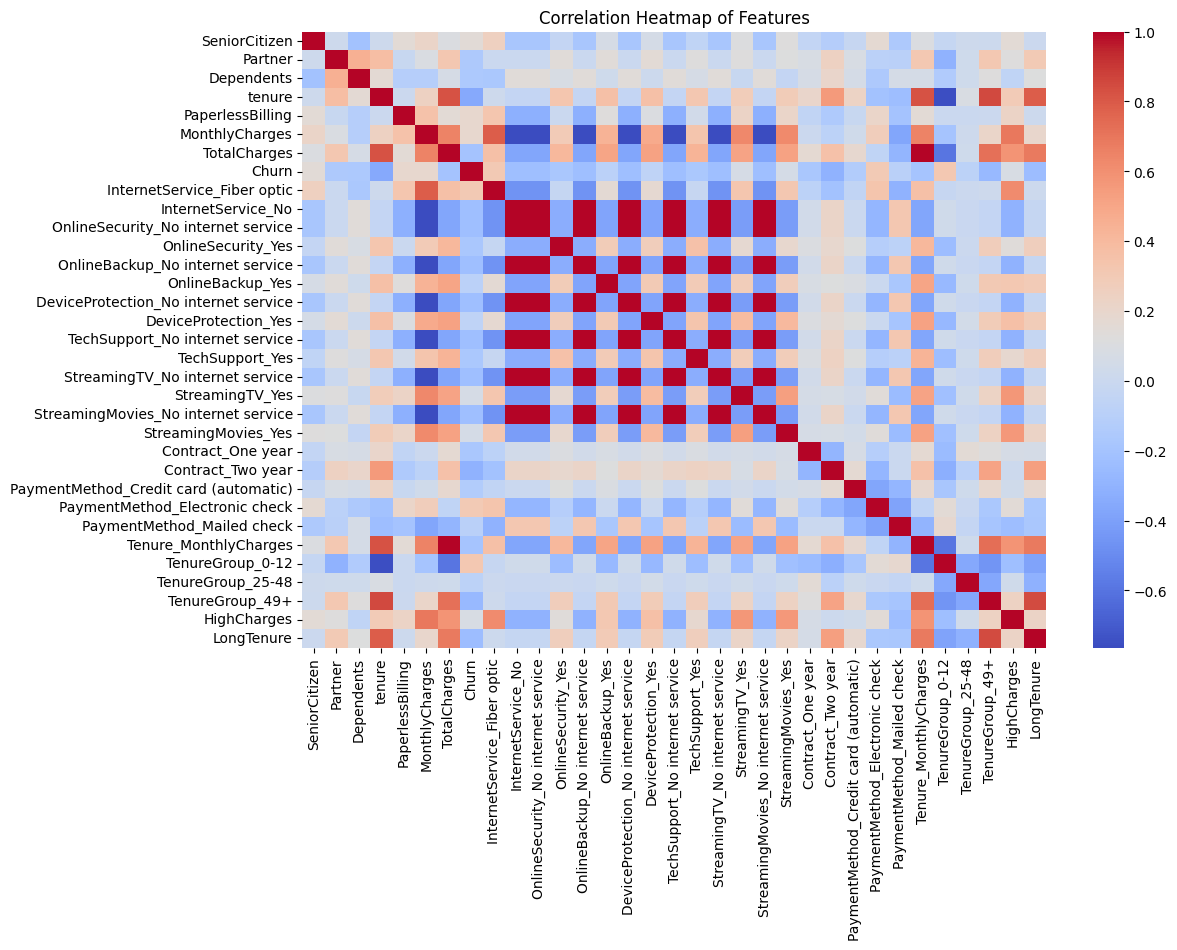

In [13]:
correlations = data.corr()['Churn'].sort_values()
print("Correlations with Churn:\n", correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.savefig('images/correlation_heatmap.png')
plt.show()

In [14]:
data.to_csv('data/engineered_telco_churn.csv', index=False)
print("Saved engineered dataset to data/engineered_telco_churn.csv")
print("Final columns:", data.columns.tolist())

Saved engineered dataset to data/engineered_telco_churn.csv
Final columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Tenure_MonthlyCharges', 'TenureGroup_0-12', 'TenureGroup_25-48', 'TenureGroup_49+', 'HighCharges', 'LongTenure']


## Feature Engineering
- Created interaction features:
  - `Tenure_MonthlyCharges`: Product of `tenure` and `MonthlyCharges` to capture spending over time.
  - `ServicesCount`: Sum of subscribed services (e.g., phone, internet, streaming) to measure loyalty.
- Binned `tenure` into `TenureGroup` (0-12, 13-24, 25-48, 49+ months) and one-hot encoded.
- Added binary flags:
  - `HighCharges`: 1 if `MonthlyCharges` in top 25%.
  - `LongTenure`: 1 if `tenure` in top 25%.
- Analyzed correlations with `Churn` and visualized with a heatmap.
- Saved engineered dataset to `data/engineered_telco_churn.csv`.